In [38]:
import sys
from collections import defaultdict
import random
import numpy as np
import matplotlib.pyplot as plt

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [27]:

def tidlists(transactions):
    tl = defaultdict(set)
    for tid, t in enumerate(transactions):
        for item in t:
            tl[item].add(tid)
    return list(tl.items())

class IntersectAll:
    def __and__(self, other):
        return other
IntersectAll = IntersectAll()

def eclat(items, minsup=0, minlen=1):
    frequent_itemsets = {(): IntersectAll}
    def recurse(items, prefix):
        while len(items) > 0:
            item, item_tidlist = items.pop()
            l = prefix + (item,)  # l is the (ordered) tuple of items we are looking for
            new_tidlist = frequent_itemsets[prefix] & item_tidlist
            if len(new_tidlist) >= minsup:  # add frequent_itemsets to the new frequent_itemsets
                frequent_itemsets[l] = new_tidlist
            
            # define the new l-conditional database
            new_items = []
            for new_item, _item_tidlist in items:
                new_item_tidlist = _item_tidlist & item_tidlist
                if len(new_item_tidlist) >= minsup:
                    new_items.append((new_item, new_item_tidlist))
            
            # recurse, with l as prefix
            recurse(new_items, l)
    
    recurse(items.copy(), ())
    return {k: len(v) for k, v in frequent_itemsets.items() if len(k) >= minlen}


<IPython.core.display.Javascript object>

In [28]:
# tạo danh sách lưu các giao dịch (transaction)
dataset = [
    ["Eggs", "Milk", "Onion", "Nutmeg", "Kidney Beans", "Yogurt"],
    ["Dill", "Onion", "Nutmeg", "Eggs", "Yogurt"],
    ["Milk", "Apple", "Kidney Beans", "Eggs"],
    ["Milk", "Unicorn", "Corn", "Kidney Beans", "Yogurt"],
    ["Corn", "Onion", "Kidney Beans", "Ice cream", "Eggs"],
    ["Orange", "Corn", "Eggs", "Yogurt"],
    ["Milk", "Apple", "Orange", "Eggs"],
    ["Corn", "Coke", "Kidney Beans", "Ice cream"],
    ["Dill", "Onion", "Nutmeg"],
    ["Coke", "Apple", "Ice cream"],
]

<IPython.core.display.Javascript object>

In [29]:
tid_list = tidlists(dataset)
tid_list

[('Eggs', {0, 1, 2, 4, 5, 6}),
 ('Milk', {0, 2, 3, 6}),
 ('Onion', {0, 1, 4, 8}),
 ('Nutmeg', {0, 1, 8}),
 ('Kidney Beans', {0, 2, 3, 4, 7}),
 ('Yogurt', {0, 1, 3, 5}),
 ('Dill', {1, 8}),
 ('Apple', {2, 6, 9}),
 ('Unicorn', {3}),
 ('Corn', {3, 4, 5, 7}),
 ('Ice cream', {4, 7, 9}),
 ('Orange', {5, 6}),
 ('Coke', {7, 9})]

<IPython.core.display.Javascript object>

In [30]:
# minsup=2 chỉ xét sản phẩm có ít nhất 2 giao dịch trở lên
# minlen=2: chỉ xét 2 sản phẩm liên quan

result = eclat(tid_list, minsup=2, minlen=2)
result

{('Coke', 'Ice cream'): 2,
 ('Orange', 'Eggs'): 2,
 ('Ice cream', 'Corn'): 2,
 ('Ice cream', 'Corn', 'Kidney Beans'): 2,
 ('Ice cream', 'Kidney Beans'): 2,
 ('Corn', 'Yogurt'): 2,
 ('Corn', 'Kidney Beans'): 3,
 ('Corn', 'Eggs'): 2,
 ('Apple', 'Milk'): 2,
 ('Apple', 'Milk', 'Eggs'): 2,
 ('Apple', 'Eggs'): 2,
 ('Dill', 'Nutmeg'): 2,
 ('Dill', 'Nutmeg', 'Onion'): 2,
 ('Dill', 'Onion'): 2,
 ('Yogurt', 'Kidney Beans'): 2,
 ('Yogurt', 'Kidney Beans', 'Milk'): 2,
 ('Yogurt', 'Nutmeg'): 2,
 ('Yogurt', 'Nutmeg', 'Onion'): 2,
 ('Yogurt', 'Nutmeg', 'Onion', 'Eggs'): 2,
 ('Yogurt', 'Nutmeg', 'Eggs'): 2,
 ('Yogurt', 'Onion'): 2,
 ('Yogurt', 'Onion', 'Eggs'): 2,
 ('Yogurt', 'Milk'): 2,
 ('Yogurt', 'Eggs'): 3,
 ('Kidney Beans', 'Onion'): 2,
 ('Kidney Beans', 'Onion', 'Eggs'): 2,
 ('Kidney Beans', 'Milk'): 3,
 ('Kidney Beans', 'Milk', 'Eggs'): 2,
 ('Kidney Beans', 'Eggs'): 3,
 ('Nutmeg', 'Onion'): 3,
 ('Nutmeg', 'Onion', 'Eggs'): 2,
 ('Nutmeg', 'Eggs'): 2,
 ('Onion', 'Eggs'): 3,
 ('Milk', 'Eggs'): 3}

<IPython.core.display.Javascript object>

In [31]:
"""
minlen=2 => mỗi dòng sẽ có 1 nhóm gồm 2 sản phẩm
"""

'\nminlen=2 => mỗi dòng sẽ có 1 nhóm gồm 2 sản phẩm\n'

<IPython.core.display.Javascript object>

In [32]:
type(result)

dict

<IPython.core.display.Javascript object>

In [33]:
# tính confidence và lift dựa vào support
result

{('Coke', 'Ice cream'): 2,
 ('Orange', 'Eggs'): 2,
 ('Ice cream', 'Corn'): 2,
 ('Ice cream', 'Corn', 'Kidney Beans'): 2,
 ('Ice cream', 'Kidney Beans'): 2,
 ('Corn', 'Yogurt'): 2,
 ('Corn', 'Kidney Beans'): 3,
 ('Corn', 'Eggs'): 2,
 ('Apple', 'Milk'): 2,
 ('Apple', 'Milk', 'Eggs'): 2,
 ('Apple', 'Eggs'): 2,
 ('Dill', 'Nutmeg'): 2,
 ('Dill', 'Nutmeg', 'Onion'): 2,
 ('Dill', 'Onion'): 2,
 ('Yogurt', 'Kidney Beans'): 2,
 ('Yogurt', 'Kidney Beans', 'Milk'): 2,
 ('Yogurt', 'Nutmeg'): 2,
 ('Yogurt', 'Nutmeg', 'Onion'): 2,
 ('Yogurt', 'Nutmeg', 'Onion', 'Eggs'): 2,
 ('Yogurt', 'Nutmeg', 'Eggs'): 2,
 ('Yogurt', 'Onion'): 2,
 ('Yogurt', 'Onion', 'Eggs'): 2,
 ('Yogurt', 'Milk'): 2,
 ('Yogurt', 'Eggs'): 3,
 ('Kidney Beans', 'Onion'): 2,
 ('Kidney Beans', 'Onion', 'Eggs'): 2,
 ('Kidney Beans', 'Milk'): 3,
 ('Kidney Beans', 'Milk', 'Eggs'): 2,
 ('Kidney Beans', 'Eggs'): 3,
 ('Nutmeg', 'Onion'): 3,
 ('Nutmeg', 'Onion', 'Eggs'): 2,
 ('Nutmeg', 'Eggs'): 2,
 ('Onion', 'Eggs'): 3,
 ('Milk', 'Eggs'): 3}

<IPython.core.display.Javascript object>

In [13]:
# "kiểm tra có giao dịch nào có Milk hay không? nếu có thì nó kết hợp với sp nào?"
for key, value in result.items():
    if "Milk" in key:
        print(key, ":", value)

('Apple', 'Milk') : 2
('Apple', 'Milk', 'Eggs') : 2
('Yogurt', 'Kidney Beans', 'Milk') : 2
('Yogurt', 'Milk') : 2
('Kidney Beans', 'Milk') : 3
('Kidney Beans', 'Milk', 'Eggs') : 2
('Milk', 'Eggs') : 3


<IPython.core.display.Javascript object>

In [35]:
# các giao dịch có milk
# => milk có thể kết hợp với Apple, Apple & Eggs , ....

<IPython.core.display.Javascript object>

In [16]:
import numpy as np

<IPython.core.display.Javascript object>

In [36]:
items = result.keys()
suports = result.values()
list_items = []
for item in items:
    list_items.append(", ".join(item))

<IPython.core.display.Javascript object>

In [37]:
list_items

['Coke, Ice cream',
 'Orange, Eggs',
 'Ice cream, Corn',
 'Ice cream, Corn, Kidney Beans',
 'Ice cream, Kidney Beans',
 'Corn, Yogurt',
 'Corn, Kidney Beans',
 'Corn, Eggs',
 'Apple, Milk',
 'Apple, Milk, Eggs',
 'Apple, Eggs',
 'Dill, Nutmeg',
 'Dill, Nutmeg, Onion',
 'Dill, Onion',
 'Yogurt, Kidney Beans',
 'Yogurt, Kidney Beans, Milk',
 'Yogurt, Nutmeg',
 'Yogurt, Nutmeg, Onion',
 'Yogurt, Nutmeg, Onion, Eggs',
 'Yogurt, Nutmeg, Eggs',
 'Yogurt, Onion',
 'Yogurt, Onion, Eggs',
 'Yogurt, Milk',
 'Yogurt, Eggs',
 'Kidney Beans, Onion',
 'Kidney Beans, Onion, Eggs',
 'Kidney Beans, Milk',
 'Kidney Beans, Milk, Eggs',
 'Kidney Beans, Eggs',
 'Nutmeg, Onion',
 'Nutmeg, Onion, Eggs',
 'Nutmeg, Eggs',
 'Onion, Eggs',
 'Milk, Eggs']

<IPython.core.display.Javascript object>

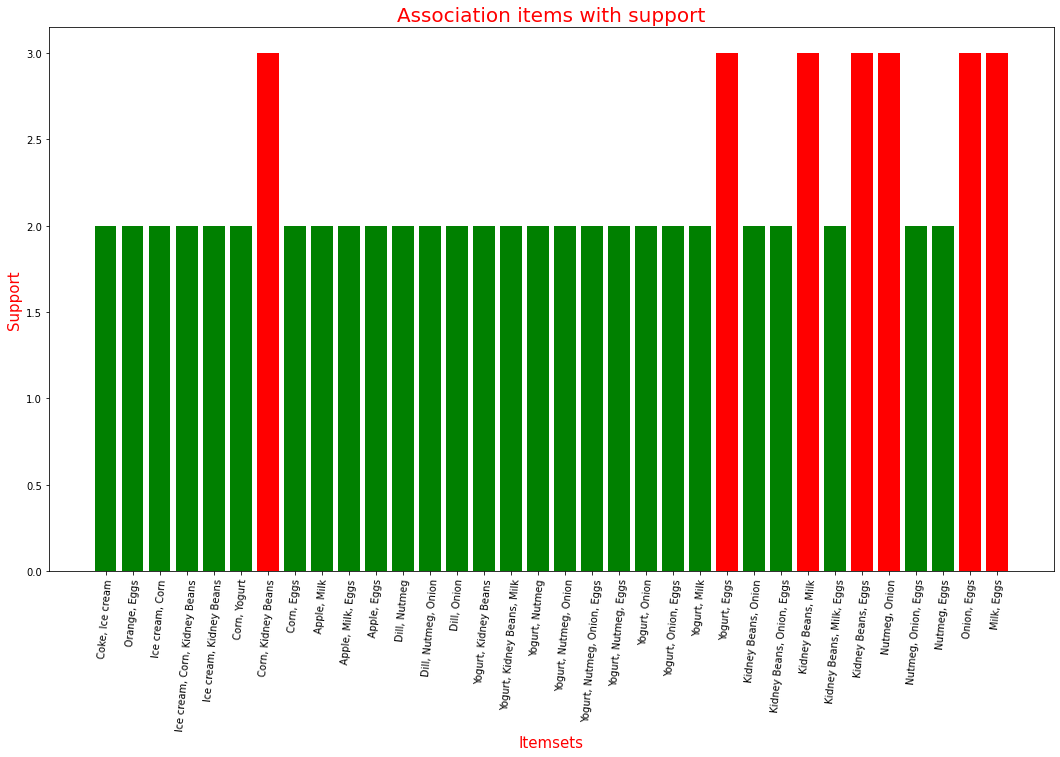

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(18, 10))

arr_support = np.array(list(suports))
list_mau = np.empty((arr_support.shape[0],), dtype=str)
list_mau[arr_support <= 2] = "green"
list_mau[arr_support > 2] = "red"

plt.bar(list_items, suports, color=list_mau)
plt.xlabel("Itemsets", color="red", fontsize=15)
plt.ylabel("Support", color="red", fontsize=15)
plt.title("Association items with support", color="red", fontsize=20)
plt.xticks(rotation=85)
plt.show()

In [42]:
"""
=> các giao dịch màu đỏ (support = 3) cho thấy các sản phẩm này kết hợp với nhau sẽ dc mua nhiều hơn
"""

'\n=> các giao dịch màu đỏ (support = 3) cho thấy các sản phẩm này kết hợp với nhau sẽ dc mua nhiều hơn\n'

<IPython.core.display.Javascript object>

In [41]:
np.array(len(suports))

array(34)

<IPython.core.display.Javascript object>

In [43]:
np.empty((len(suports),), dtype=str)
list_mau = np.empty((len(suports),), dtype=str)
list_mau[np.array(list(suports)) <= 2] = "green"
list_mau[np.array(list(suports)) > 2] = "red"
list_mau

array(['g', 'g', 'g', 'g', 'g', 'g', 'r', 'g', 'g', 'g', 'g', 'g', 'g',
       'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'g', 'g',
       'r', 'g', 'r', 'r', 'g', 'g', 'r', 'r'], dtype='<U1')

<IPython.core.display.Javascript object>